In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
# 음수기호 표시 안되는거 해결
rcParams["axes.unicode_minus"] = False
import scipy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

----------------------
# 나이브 베이즈(Naïve Bayes)
    - 선형모델 대신에 사용할 수 있음
    - 부교재 참고
    - 베이즈 종류 : 가우시안 나이브 베이즈 / 다항분포 나이브 베이즈 / 베르누이 나이브 베이즈 (https://ko.wikipedia.org/wiki/%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EB%B6%84%EB%A5%98)
----------------------

In [4]:
# 가우시안 나이브 베이즈 : 연속 변수 ()
# 연속적인 값을 지닌 데이터를 처리 할때, 전형적으로 각 클래스의 연속적인 값들이 가우스 분포를 따른다고 가정한다. 
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# 데이터 다루기 용이하게 품종별로 나누기
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

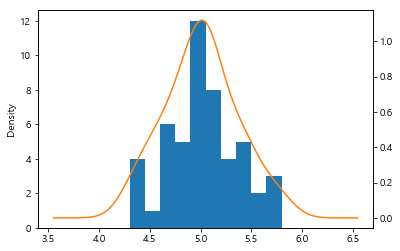

In [10]:
# 데이터 확인을 위한 특성 파
# sepal length
ax = setosa_df["sepal length (cm)"].plot(kind='hist')
setosa_df["sepal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

#### 참고 : axes는 figure 내에서 축을 가지는 하나의 좌표평면과 같은 개념이다. 실제로 데이터가 그려지는 곳은 axes(ax)

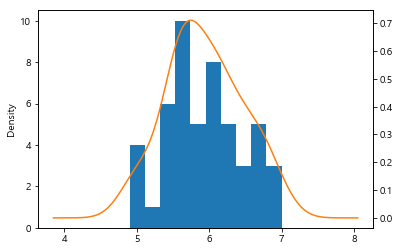

In [12]:
ax = versicolor_df["sepal length (cm)"].plot(kind='hist')
versicolor_df["sepal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

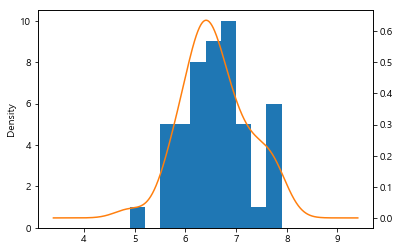

In [13]:
ax = virginica_df["sepal length (cm)"].plot(kind='hist')
virginica_df["sepal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

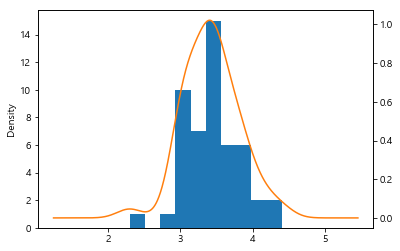

In [16]:
# sepal width (cm)
ax = setosa_df["sepal width (cm)"].plot(kind='hist')
setosa_df["sepal width (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

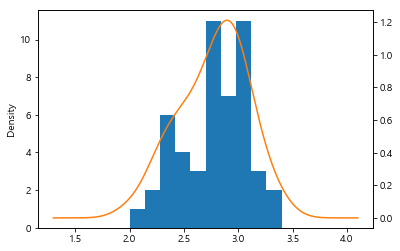

In [15]:
ax = versicolor_df["sepal width (cm)"].plot(kind='hist')
versicolor_df["sepal width (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

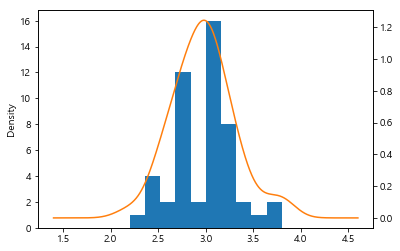

In [14]:
ax = virginica_df["sepal width (cm)"].plot(kind='hist')
virginica_df["sepal width (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

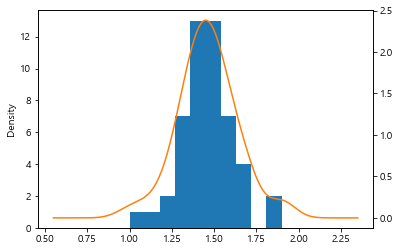

In [17]:
# petal length (cm)
ax = setosa_df["petal length (cm)"].plot(kind='hist')
setosa_df["petal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

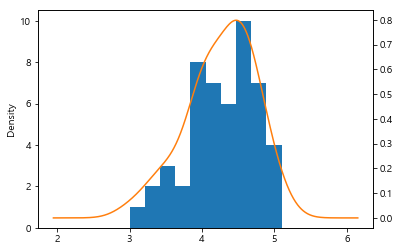

In [18]:
ax = versicolor_df["petal length (cm)"].plot(kind='hist')
versicolor_df["petal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

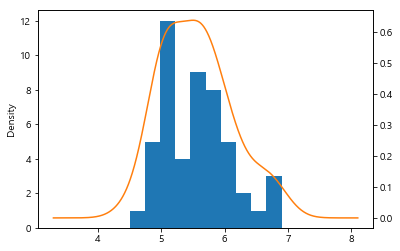

In [19]:
ax = virginica_df["petal length (cm)"].plot(kind='hist')
virginica_df["petal length (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

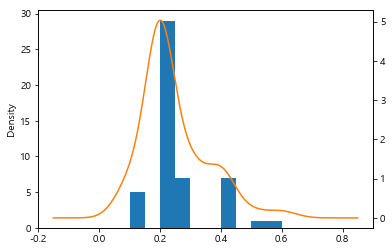

In [20]:
# petal width (cm)
ax = setosa_df["petal width (cm)"].plot(kind='hist')
setosa_df["petal width (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

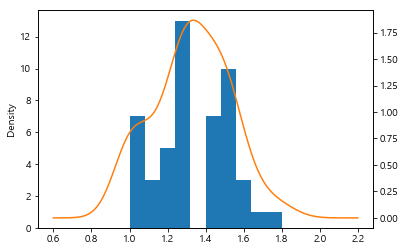

In [21]:
ax = versicolor_df["petal width (cm)"].plot(kind='hist')
versicolor_df["petal width (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

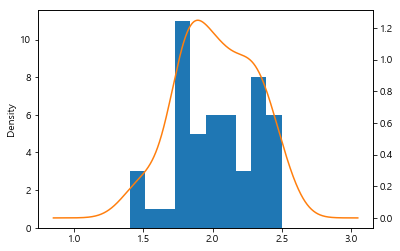

In [22]:
ax = virginica_df["petal width (cm)"].plot(kind='hist')
virginica_df["petal width (cm)"].plot(kind='kde', ax=ax, secondary_y=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train, y_train)

In [30]:
pred = model.predict(X_test)

In [31]:
accuracy_score(y_test, pred)   # 0.9333

0.9333333333333333

In [32]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.88      0.88         8
           2       0.91      0.91      0.91        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [33]:
metrics.confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 10]], dtype=int64)

In [34]:
# 다항 분포 나이브 베이즈 : 영화 리뷰 감정 분류 (~시험 문제~)
# 다항 이벤트 모델에서는, 샘플(특성 벡터)들은 다항분포 {\displaystyle (p_{1},\dots ,p_{n})} {\displaystyle (p_{1},\dots ,p_{n})}에 의해 생성된 어떤 이벤트의 빈도수를 나타낸다
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [35]:
df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [36]:
df_x = df["movie_review"]
df_y = df["label"]

In [40]:
# movie review의 단어들을 숫자로 만들기(vectorize) : CountVectorizer
cv = CountVectorizer()
# 리뷰 변환
x_traincv= cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()  # 10x37의 형태

In [41]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [44]:
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [45]:
mnb = MultinomialNB().fit(x_traincv, df_y)

In [46]:
# 테스트 데이터 준비
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


In [47]:
# type을 숫자형태로 변환하기: label
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_df

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1
5,shame shame shame,negative,0
6,awesome director shame movie boring movie,negative,0
7,do not like this movie,negative,0
8,I do not like this boring movie,negative,0
9,aweful terrible boring movie,negative,0


In [48]:
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [49]:
x_testcv = cv.transform(test_x)

In [50]:
# 예측
pred = mnb.predict(x_testcv)

In [51]:
# 정확도 확인
accuracy_score(test_y, pred)

1.0

In [63]:
# 베르누이 나이브 베이즈 : 스팸 메일 필터
# 다변수 베르누이 이벤트 모델에서, 특성들은 입력들을 설명하는 독립적인 부울 값(이진 변수)이다. 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [52]:
# 이메일 데이터 준비
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [54]:
df["label"] = df["spam"].map({True: 1, False: 0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [55]:
df_x = df["email title"]
df_y = df["label"]

In [57]:
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()
encoded_input

# 어떤 경우에 다항분포를 쓰고, 어떤 경우에 베르누이를 쓰는지 구분해둘 

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [59]:
#다시 문자로 보기
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [60]:
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [64]:
bnb = BernoulliNB().fit(x_traincv, df_y)

In [66]:
# 테스트용 메일
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df

,email title,spam
0,free flight offer,True
1,hey traveler free flight deal,True
2,limited free game offer,True
3,today flight schedule,False
4,your credit card attached,False
5,free credit card offer only today,False


In [67]:
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_df

,email title,spam,label
0,free flight offer,True,1
1,hey traveler free flight deal,True,1
2,limited free game offer,True,1
3,today flight schedule,False,0
4,your credit card attached,False,0
5,free credit card offer only today,False,0


In [68]:
test_x = test_df["email title"]
test_y = test_df["label"]
x_testcv = cv.transform(test_x)

In [70]:
pred = bnb.predict(x_testcv)

In [71]:
accuracy_score(test_y, pred)   # 0.8333

0.8333333333333334

------------------
# K-Means
    - 가장 대표적인 비지도학습 알고리즘
    - 부교재
-----------------

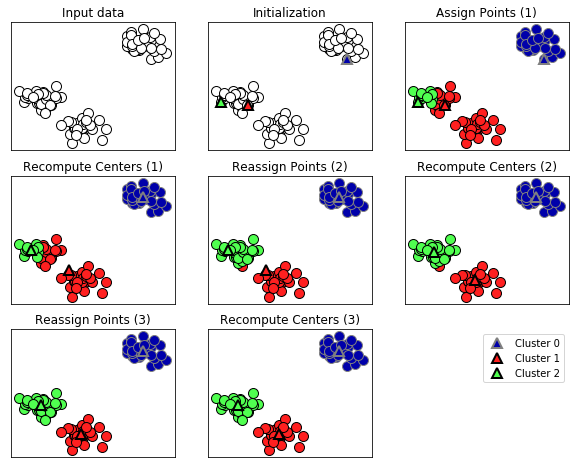

In [3]:
mglearn.plots.plot_kmeans_algorithm()

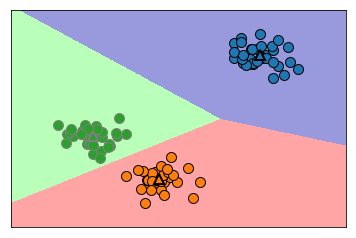

In [5]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# make_blobs : 예제 데이터
X, y = datasets.make_blobs(random_state=1)

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3).fit(X)  # 비지도 학습에서는 정답을 주고 학습시키는게 없다. X 자체로 학습 -> 스스로 y(label)을 만

In [7]:
print(km.labels_)  # 세개로 분류되었음
lbl = km.labels_

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


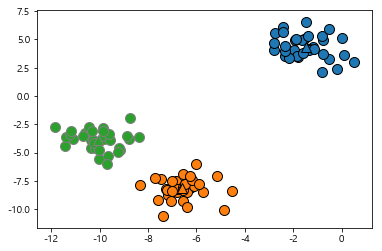

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers="o")
# 군집 중심점 표
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2], markers="^")

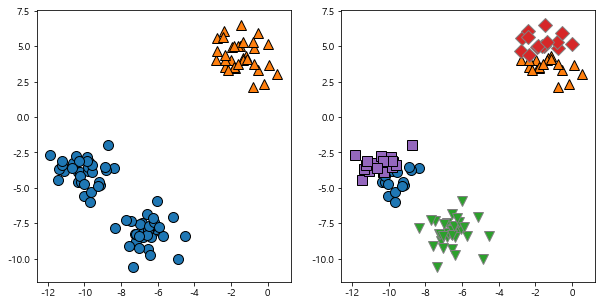

In [9]:
# 중심점을 2개로 했을 때 / 5개로 했을 때
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
idx = 0
for k in [2, 5]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax=axes[idx])
    idx += 1

In [27]:
# iris 샘플에 K-Means 적용
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
#X.columns = iris.feature_names
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

y = pd.DataFrame(iris.target)
y.columns=["Target"]
y

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


----------------------------------------
#### 꽃잎(Petal)과 꽃받침(Sepal)중에 어떤 것이 더 분류하기 쉬운가?

Text(0.5, 1.0, '꽃잎')

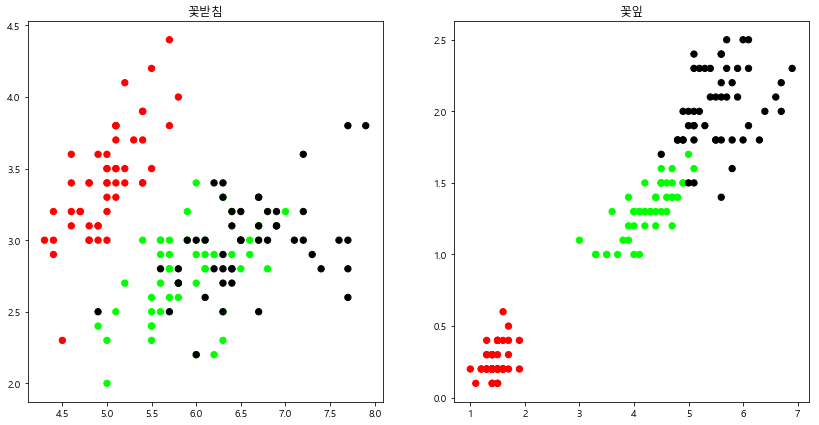

In [50]:
plt.figure(figsize=(14, 7))  # 인자 튜플로 넘겨줘야
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 2, 1)   # (1, 2, 1) : 1행 2열 중 첫번째를 선택해서 그린다
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.Target], s=40)
plt.title("꽃받침")
# 결과 그래프 : 구분이 쉽지 않음

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Target], s=40)
plt.title("꽃잎")
# 결과 그래프 : 구분 잘 됨

# 결론: 꽃받침보다는 꽃잎으로 분류를 하는게 결과가 좋을 것이다.

In [52]:
model = KMeans(n_clusters=3).fit(X)

In [53]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, '예측값')

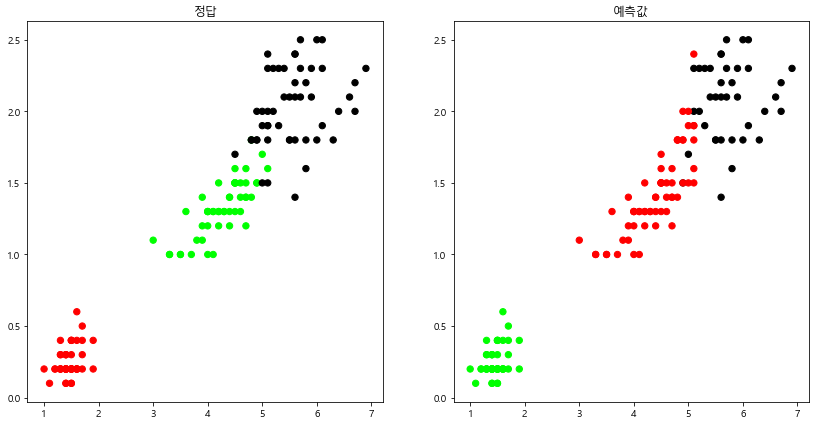

In [54]:
plt.figure(figsize=(14, 7))  # 인자 튜플로 넘겨줘야
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 2, 1)   # (1, 2, 1) : 1행 2열 중 첫번째를 선택해서 그린다
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Target], s=40)
plt.title("정답")
# 결과 그래프 : 구분이 쉽지 않음

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("예측값")

### The Fix
    http://stamfordresearch.com/k-means-clustering-in-python/
    giving each group the correct number

In [55]:
# using the np.choose()
# changing the 1’s in the predicted values to 0’s and the 0’s to 1’s

predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (model.labels_)
print (predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, 'K Mean Classification')

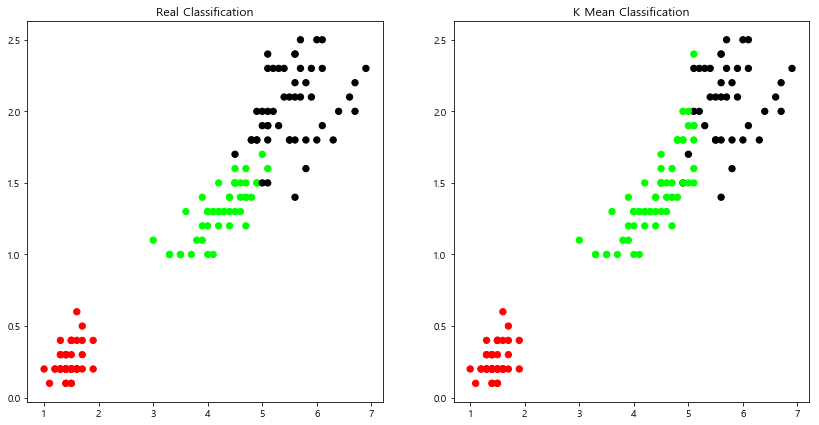

In [60]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Target], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [62]:
# 예측 정확도
accuracy_score(y, predY)  # 0.8933

0.8933333333333333

In [63]:
metrics.confusion_matrix(y, predY)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

----------------------------------------
#### 사람들의 키와 몸무게를 이용한 K-Means

In [35]:
df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]
df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


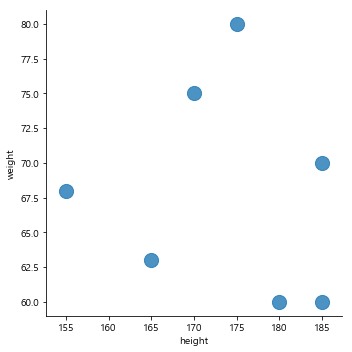

In [36]:
# 먼저 시각화를 이용하여 분포 모양새를 알아본다.
sns.lmplot('height', 'weight', data=df, fit_reg=False, scatter_kws={"s":200})

In [71]:
model = KMeans(n_clusters=3).fit(df)

In [73]:
model.labels_

array([1, 1, 1, 2, 2, 0, 0])

In [74]:
df["cluster_id"] = model.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,2
4,155,68,2
5,170,75,0
6,175,80,0


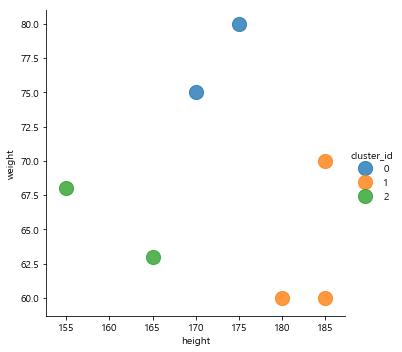

In [75]:
sns.lmplot('height', 'weight', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")